### 0. 데이터 전처리 및 정리

In [8]:
import numpy as np
import pandas as pd

In [9]:
df1 = pd.read_csv('match_winner_data_version1.csv')
df2 = pd.read_csv('match_loser_data_version1.csv')
#df3 = pd.read_csv('match_data_version1.csv')
### match_data_version1 에 팀별 win/lose data 추가

df = pd.concat([df1,df2], ignore_index=True)
df.head

<bound method NDFrame.head of         Unnamed: 0  teamId   win  firstBlood  firstTower  firstInhibitor  \
0                0     200   Win       False        True            True   
1                1     100   Win       False       False           False   
2                2     200   Win        True        True            True   
3                3     200   Win        True        True           False   
4                4     100   Win        True        True            True   
...            ...     ...   ...         ...         ...             ...   
217653      108824     200  Fail        True       False           False   
217654      108825     200  Fail       False        True           False   
217655      108826     200  Fail        True        True            True   
217656      108827     200  Fail       False       False           False   
217657      108828     200  Fail        True       False            True   

        firstBaron  firstDragon  firstRiftHerald  towerKi

In [10]:
#데이터 공백 값 0으로 반환
df = df.fillna(0)
df.isnull().sum().sum()

0

### 1. 승리팀 평균치, 패배팀 평균치 비교

In [11]:
df.describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,217658.000000,217658.000000,217658.000000,217658.000000
mean,4.257229,0.657963,0.300145,1.384806
std,3.369675,0.916068,0.540213,1.288438
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,1.000000
75%,7.000000,1.000000,1.000000,2.000000
max,11.000000,10.000000,5.000000,7.000000


In [12]:
df[df['win'] == 'Fail'].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,108817.000000,108817.000000,108817.000000,108817.000000
mean,1.854223,0.136137,0.109147,0.817198
std,1.970486,0.474416,0.354833,1.014351
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,1.000000
max,11.000000,7.000000,4.000000,6.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

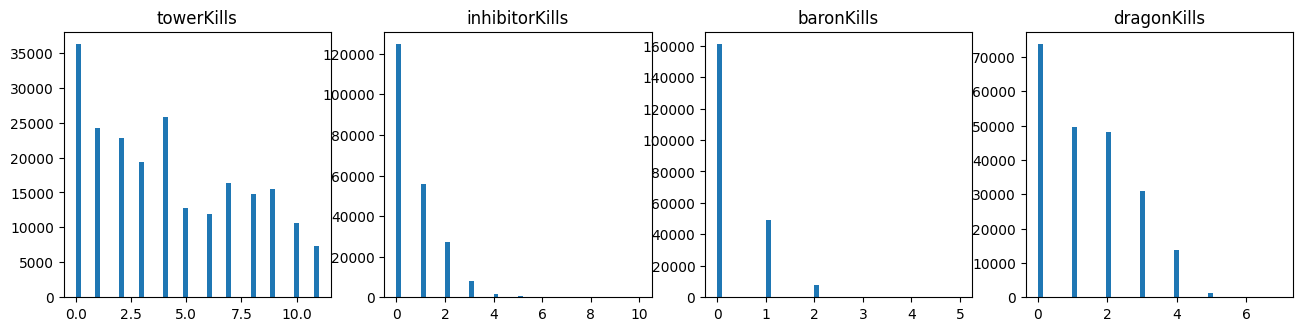

In [14]:
df_hist = df[['towerKills','inhibitorKills','baronKills','dragonKills']]

def plot_hist_each_column(df_hist):
    plt.rcParams['figure.figsize'] = [20,20]
    fig = plt.figure()
    for i in range(len(df_hist.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df_hist[df_hist.columns[i]], bins=50)
        ax.set_title(df_hist.columns[i])
    plt.show()

plot_hist_each_column(df_hist)

### 2. 승리팀 중요 변수 확인

In [15]:
# 숫자형 데이터 제거, 퍼스트 데이터만 요인 분석
df_first = df.drop(["towerKills","inhibitorKills","baronKills",
         "dragonKills","vilemawKills","riftHeraldKills",
         "dominionVictoryScore","gameId","teamId","Unnamed: 0",
        "bans"], axis=1)

df_first.head

<bound method NDFrame.head of          win  firstBlood  firstTower  firstInhibitor  firstBaron  firstDragon  \
0        Win       False        True            True       False         True   
1        Win       False       False           False       False         True   
2        Win        True        True            True       False         True   
3        Win        True        True           False       False        False   
4        Win        True        True            True        True         True   
...      ...         ...         ...             ...         ...          ...   
217653  Fail        True       False           False       False        False   
217654  Fail       False        True           False       False         True   
217655  Fail        True        True            True       False         True   
217656  Fail       False       False           False        True         True   
217657  Fail        True       False            True       False        False  

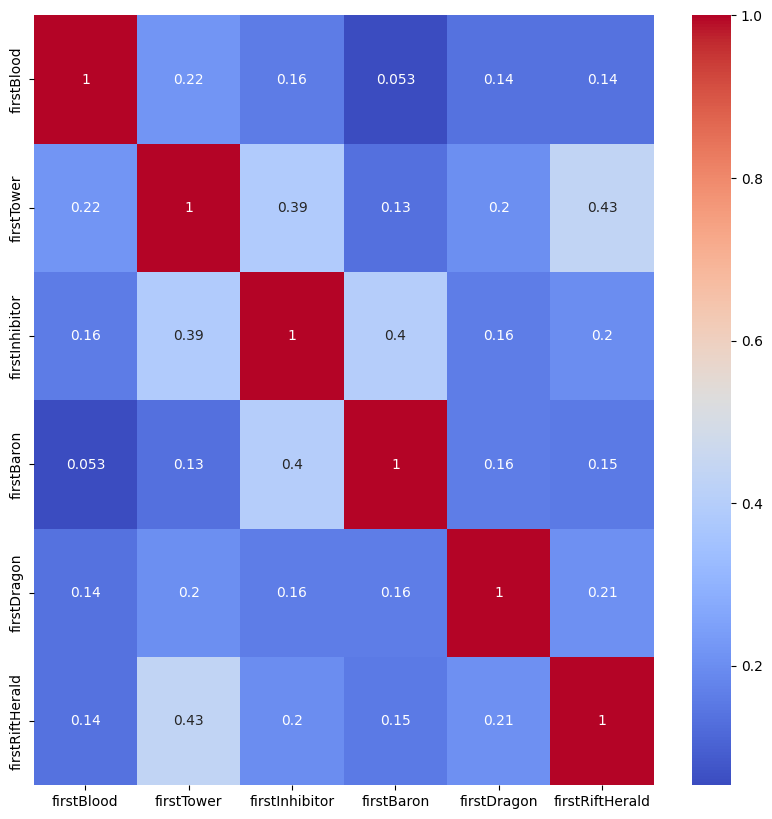

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#항목별 상관도 확인
plt.figure(figsize=(10,10))
sns.heatmap(df_first.corr(),cmap='coolwarm',annot=True)
plt.show()

In [17]:
df_first['win'] = df['win'].replace({'Win':1, 'Fail':0})
df_first["firstBlood"] = df["firstBlood"].astype(int)
df_first["firstTower"] = df["firstTower"].astype(int)
df_first["firstInhibitor"] = df["firstInhibitor"].astype(int)
df_first["firstDragon"] = df["firstDragon"].astype(int)
df_first["firstBaron"] = df["firstBaron"].astype(int)
df_first["firstRiftHerald"] = df["firstRiftHerald"].astype(int)

In [18]:
df_first.groupby('win').mean()

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
win,,,,,,
0,0.395510,0.262559,0.066517,0.080705,0.298909,0.274927
1,0.602321,0.725239,0.694962,0.394224,0.559704,0.518823


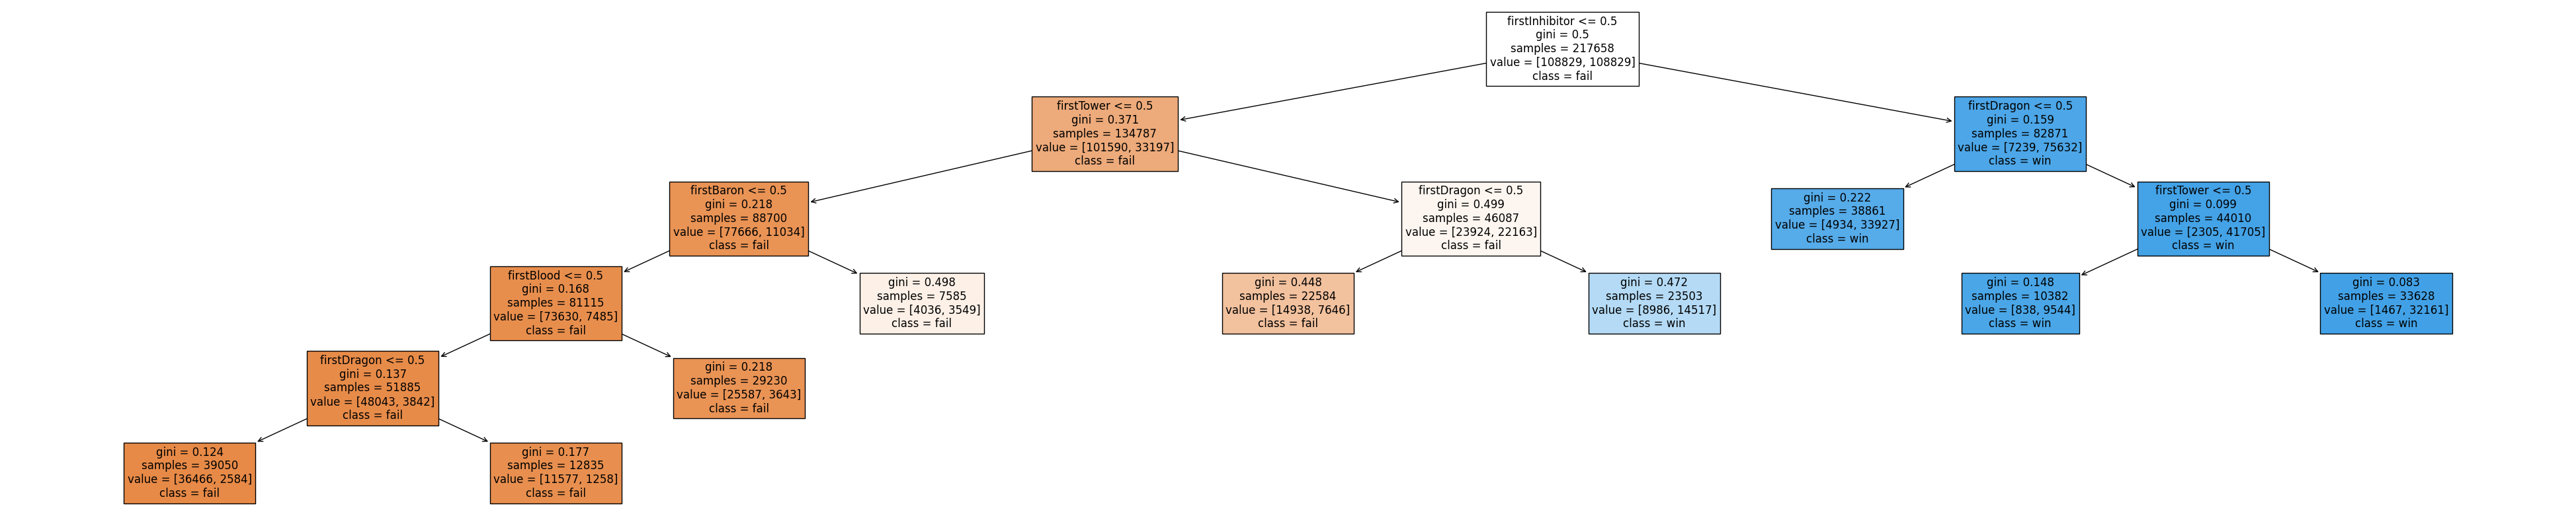

In [19]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = df_first.drop(['win'], axis=1)
y = df_first['win']
xname = X.columns
yname = ['fail','win']

c_tree = DecisionTreeClassifier(min_samples_split=40000,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(50,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()


### 3. 경기 시간 segment 별 EDA

### 4. 앙상블 분석 : 승리 예측 정확도 비교

     4.1 랜덤포레스트

In [20]:
# df 전체 win / fail -> 1 / 0 으로 바꿔줌
df['win'] = df['win'].replace({'Win':1, 'Fail':0})

In [21]:
from sklearn.model_selection import train_test_split

X = df[['firstBlood', 'firstTower',
       'firstBaron', 'firstDragon', 'firstInhibitor', 'dragonKills',
       'baronKills', 'towerKills', 'inhibitorKills']]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=123456)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

#oob_score = out of bag score로써 예측이 얼마나 정확한가에 대한 추정치입니다.
print(f'랜덤포레스트 테스트 정확도=  : {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')


랜덤포레스트 테스트 정확도=  : 0.876
Mean accuracy score: 0.875


    4.2 GradientBoosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train,y_train)

y_pred = clf_gbc.predict(X_test)

print('GradientBoosting 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))

GradientBoosting 테스트 정확도 = 0.8728843149866765


    4.3 Xgboost

In [23]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot

In [28]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print('Xgboost 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))#정확도 계산

Xgboost 테스트 정확도 = 0.8767619222640816


    4.4 변수 중요도 체크

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 1000x500 with 0 Axes>

 1)firstBlood                    0.411785
 2)firstTower                    0.202681
 3)firstBaron                    0.162369
 4)firstDragon                   0.086680
 5)firstInhibitor                0.067260
 6)dragonKills                   0.025794
 7)baronKills                    0.018837
 8)towerKills                    0.014028
 9)inhibitorKills                0.010566


Text(0.5, 1.0, '랜덤포레스트 Feature Importances')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x1c760a308b0>,
 [Text(0, 0, 'firstBlood'),
  Text(1, 0, 'firstTower'),
  Text(2, 0, 'firstBaron'),
  Text(3, 0, 'firstDragon'),
  Text(4, 0, 'firstInhibitor'),
  Text(5, 0, 'dragonKills'),
  Text(6, 0, 'baronKills'),
  Text(7, 0, 'towerKills'),
  Text(8, 0, 'inhibitorKills')])

(-1.0, 9.0)

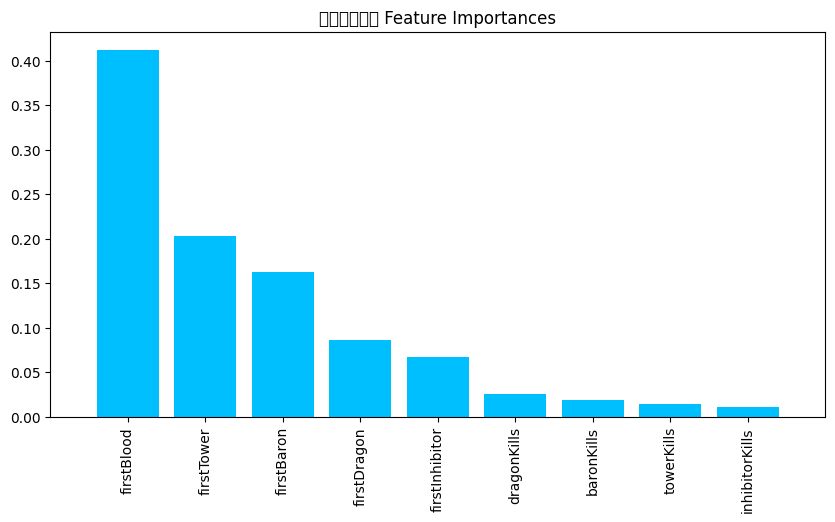

In [32]:
# 랜덤포레스트 변수 중요도
plt.figure(figsize=(10,5))

features_label = X.columns
rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]
for i in range(X.shape[1]):
     print('%2d)%-*s%f'%(i+1, 30, features_label[i], rf_importances[indices[i]]))
plt.title('랜덤포레스트 Feature Importances')
plt.bar(range(X.shape[1]), rf_importances[indices], color='deepskyblue', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Gradient Boosting Feature importances')

<AxesSubplot: title={'center': 'Gradient Boosting Feature importances'}>

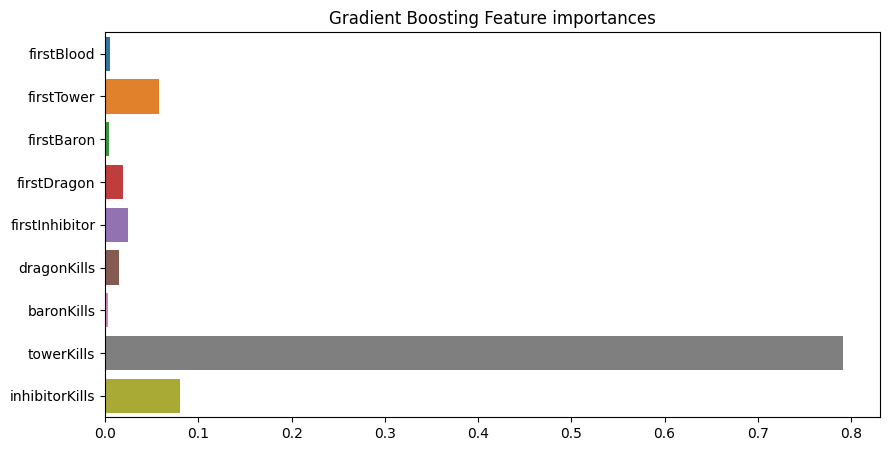

In [33]:
# Gradient Boosting 변수 중요도
plt.figure(figsize=(10,5))

gb_importances = clf_gbc.feature_importances_
gb_importances = pd.Series(gb_importances, index = X_train.columns)

plt.title('Gradient Boosting Feature importances')
sns.barplot(x=gb_importances, y=X_train.columns)
plt.show()

<AxesSubplot: title={'center': 'xgboost Feature importances'}, xlabel='F score', ylabel='Features'>

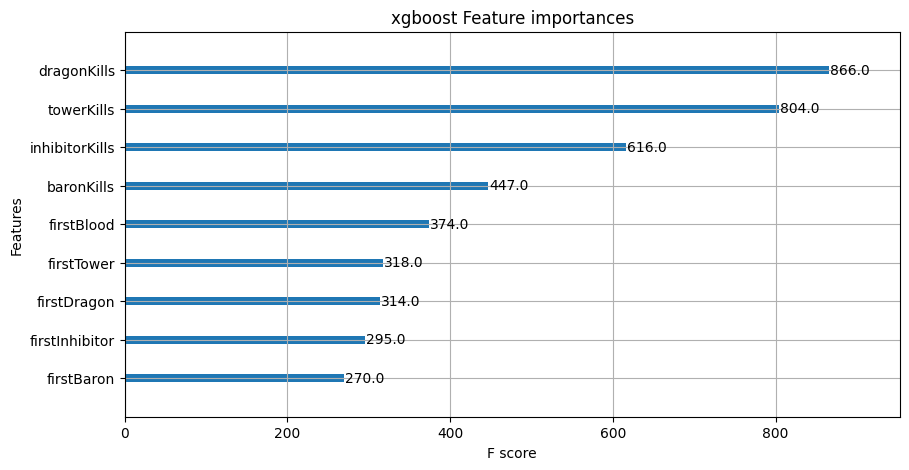

In [34]:
# xgboost 변수 중요도

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_model, title='xgboost Feature importances', ax=ax)

### 5. 로지스틱 회귀분석